In [ ]:

#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
pip install yfinance


In [ ]:
import numpy as np
import pandas as pd
import math
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# Fetch Tesla stock data
df = yf.download('TSLA', start='2011-07-01', end='2025-03-22', auto_adjust=False)

# Check available columns
print("Available columns:", df.columns)

# Ensure 'Close' column exists before filtering
if 'Close' in df.columns:
    data = df[['Close']].copy()  # Use double brackets to maintain DataFrame structure
else:
    raise KeyError("Column 'Close' not found in dataset! Check available columns.")

# Print dataset shape to verify
print("Dataset Shape:", data.shape)  # Should be (rows, 1)

# Convert DataFrame to NumPy array
dataset = data.values

# Ensure dataset is not empty
if dataset.size == 0:
    raise ValueError("Dataset is empty! Please check data source.")

# Define the number of rows for training (85% of total data)
training_data_len = math.ceil(len(dataset) * 0.85)
print(f"Training Data Length: {training_data_len}")

# Scale data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Print scaled data shape
print("Scaled Data Shape:", scaled_data.shape)  # Should match dataset shape


[*********************100%***********************]  1 of 1 completed

Available columns: MultiIndex([('Adj Close', 'TSLA'),
            (    'Close', 'TSLA'),
            (     'High', 'TSLA'),
            (      'Low', 'TSLA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])
Dataset Shape: (3451, 1)
Training Data Length: 2934
Scaled Data Shape: (3451, 1)


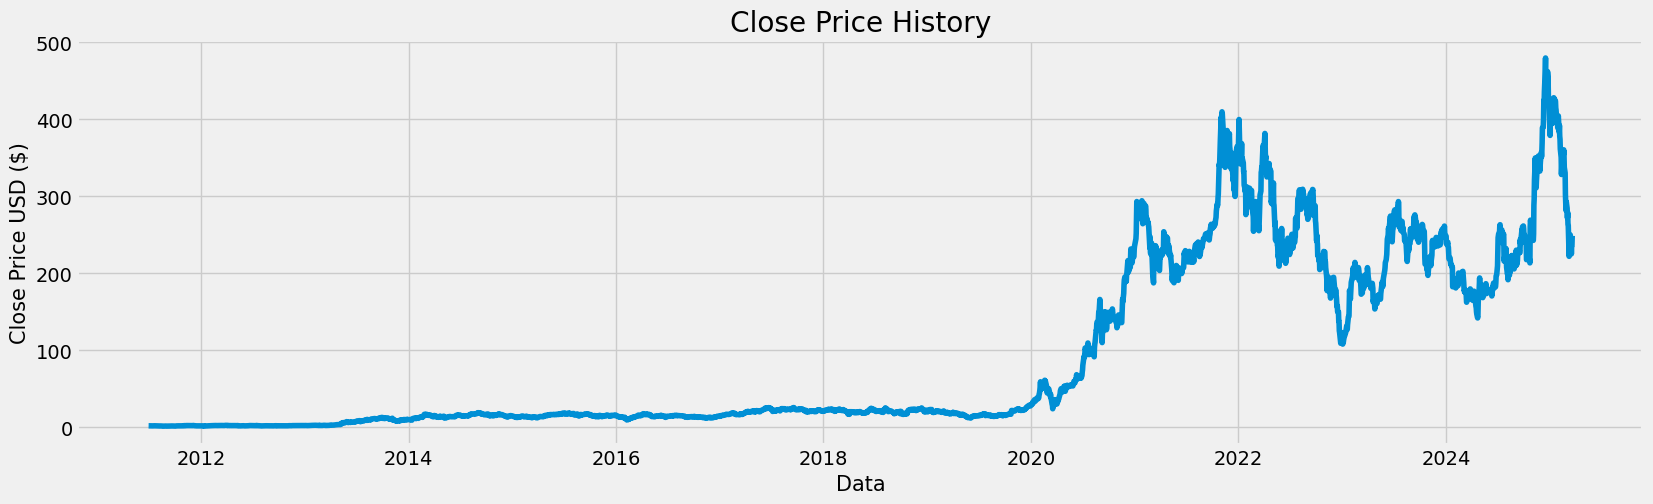

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(18,5))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=15 )
plt.ylabel('Close Price USD ($)', fontsize=15)
plt.show()

In [ ]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(180,len(train_data)):
    x_train.append(train_data[i-180:i,0])
    y_train.append(train_data[i,0])

    if i<=180:
      print(x_train)
      print(y_train)
      print()

[array([9.85236787e-04, 1.00195935e-03, 9.76875632e-04, 1.08417770e-03,
       9.55972496e-04, 8.91868647e-04, 8.66784933e-04, 9.32280729e-04,
       7.88747155e-04, 7.84566578e-04, 7.35791098e-04, 8.27765048e-04,
       9.39249937e-04, 9.40642133e-04, 1.02286248e-03, 9.11377593e-04,
       8.43095410e-04, 7.92927733e-04, 8.66784933e-04, 8.66784933e-04,
       9.50397479e-04, 7.51121460e-04, 7.31610521e-04, 3.90192876e-04,
       3.19122312e-04, 2.35509517e-04, 4.33393588e-04, 2.60593480e-04,
       4.66838457e-04, 6.07585643e-04, 5.96438101e-04, 5.78321352e-04,
       5.40695657e-04, 3.21908699e-04, 4.87754800e-05, 0.00000000e+00,
       1.40749180e-04, 2.67560445e-04, 1.61652566e-04, 2.48051499e-04,
       3.84618108e-04, 3.73470317e-04, 3.88798685e-04, 2.85677194e-04,
       1.56077549e-04, 1.37960800e-04, 2.63379867e-04, 2.31328940e-04,
       1.42141377e-04, 1.29599645e-04, 2.96824736e-04, 3.33058234e-04,
       3.99948470e-04, 5.36515079e-04, 5.32334502e-04, 5.65779371e-04,
     

In [ ]:
len(train_data)

2934

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2754, 180, 1)

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)


2754/2754 ━━━━━━━━━━━━━━━━━━━━ 231s 81ms/step - loss: 0.0019


In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 180: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(180,len(test_data)):
    x_test.append(test_data[i-180:i,0])

In [ ]:
x_test = np.array(x_test)


In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))


In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#Undo scaling

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


In [ ]:

#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

np.float64(15.340916382747317)

<ipython-input-18-7d95dd1371f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


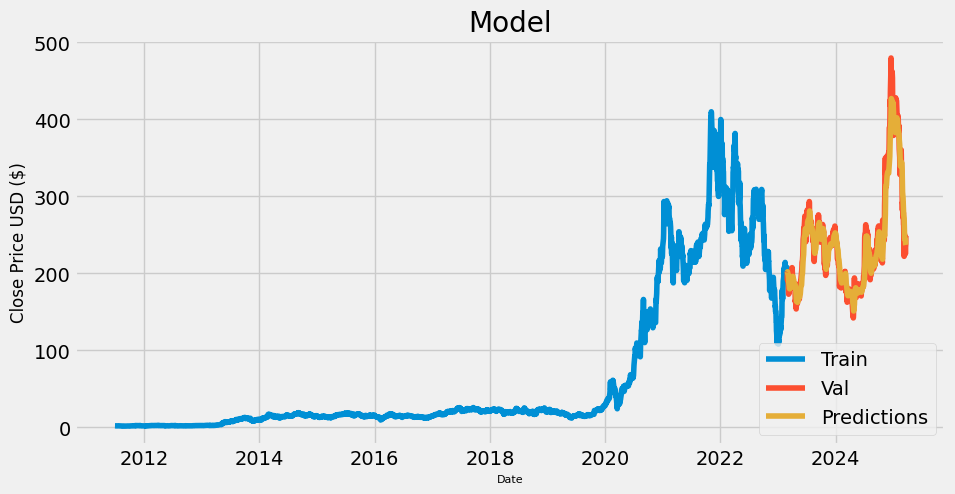

In [ ]:
#Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(10,5))
plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

Price,Close,Predictions
Ticker,TSLA,
Date,,
2023-03-01,202.770004,201.658646
2023-03-02,190.899994,202.099121
2023-03-03,197.789993,200.315643
2023-03-06,193.809998,199.105804
2023-03-07,187.710007,197.665024
...,...,...
2025-03-17,238.009995,244.133896
2025-03-18,225.309998,243.073242


In [ ]:
# Fetch Tesla stock data
tesla_quote = yf.download('TSLA', start='2024-06-01', end='2025-03-22')

# Check available columns
print("Available columns:", tesla_quote.columns)

# Ensure 'Close' column exists before filtering
if 'Close' in tesla_quote.columns:
    new_df = tesla_quote[['Close']].copy()  # Proper selection
else:
    raise KeyError("Column 'Close' not found in dataset! Check available columns.")

# Print dataset shape to verify
print("Dataset Shape:", new_df.shape)  # Should be (rows, 1)

# Get the last 180 days closing prices
last_180_days = new_df[-180:].values

# Ensure dataset is not empty
if last_180_days.size == 0:
    raise ValueError("⚠️ No data available for the last 180 days! Check data source.")

# Scale the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
last_180_days_scaled = scaler.fit_transform(last_180_days)  # Ensure it's fitted before transforming

# Create input dataset
X_test = []
X_test.append(last_180_days_scaled)

# Convert to NumPy array
X_test = np.array(X_test)

# Reshape data for model input
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)


[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True
Available columns: MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])
Dataset Shape: (201, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[241.40819]]


In [ ]:


# Load trained model (Ensure the model is already trained in Colab)
model = model  # Assuming model is already available in the Colab environment

# Download more historical data to ensure we get at least 15 trading days
latest_data = yf.download('TSLA', start='2025-02-20', end='2025-03-23')

# Ensure we have at least 15 trading days
latest_close = latest_data[['Close']].tail(15).values  # Get last 15 valid trading days
if latest_close.shape[0] < 15:
    raise ValueError(f"Not enough historical data! Only {latest_close.shape[0]} days available.")

# Scale Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(latest_close)

# Predict Future Prices
future_dates = pd.date_range(start='2025-03-24', end='2025-03-28', freq='B')
predictions = []
last_input = scaled_data.reshape(1, 15, 1)
for _ in range(len(future_dates)):
    predicted_price = model.predict(last_input)
    predictions.append(predicted_price[0, 0])
    last_input = np.append(last_input[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

# Convert back to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Create DataFrame for Trading Simulation
predicted_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': predictions.flatten()})
predicted_df.set_index('Date', inplace=True)
print("Predicted Prices:\n", predicted_df)

# Trading Simulation Parameters
initial_balance = 10000
balance = initial_balance
holdings = 0
transaction_fee = 0.01  # 1% fee
# Adjusted trading parameters
stop_loss_threshold = 0.97  # 3% stop-loss
take_profit_threshold = 1.07  # 7% take-profit

def simulate_trading(df):
    global balance, holdings
    buy_price = None  # Track last buy price for stop-loss/take-profit
    print("Starting trading simulation...")

    for i in range(len(df)):
        current_price = df['Predicted_Close'].iloc[i]
        print(f"{df.index[i]}: Current Price: ${current_price:.2f}, Balance: ${balance:.2f}, Holdings: {holdings:.2f}")

        # Stop-loss condition: Sell if price drops 3% below buy price
        if holdings > 0 and buy_price and current_price < buy_price * stop_loss_threshold:
            balance = holdings * current_price * (1 - transaction_fee)
            holdings = 0
            print(f"{df.index[i]}:  Stop-loss triggered, Selling at ${current_price:.2f}, New Balance: ${balance:.2f}")
            buy_price = None  # Reset buy price
            continue

        # Take-profit condition: Sell if price increases 7% above buy price
        if holdings > 0 and buy_price and current_price > buy_price * take_profit_threshold:
            balance = holdings * current_price * (1 - transaction_fee)
            holdings = 0
            print(f"{df.index[i]}:  Take-profit triggered, Selling at ${current_price:.2f}, New Balance: ${balance:.2f}")
            buy_price = None  # Reset buy price
            continue

        # Optimized Buy Condition: Buy only if price increase > 1% (reduces unnecessary trades)
        if i > 0 and df['Predicted_Close'].iloc[i] > df['Predicted_Close'].iloc[i - 1] * 1.01:
            if balance > 0:
                holdings = (balance * (1 - transaction_fee)) / current_price
                balance = 0
                buy_price = current_price  # Store buy price
                print(f"{df.index[i]}:  Buying at ${current_price:.2f}, Holdings: {holdings:.2f} shares")

        # Optimized Sell Condition: Sell only if price drop > 0.5%
        elif i > 0 and df['Predicted_Close'].iloc[i] < df['Predicted_Close'].iloc[i - 1] * 0.995:
            if holdings > 0:
                balance = holdings * current_price * (1 - transaction_fee)
                holdings = 0
                print(f"{df.index[i]}:  Selling at ${current_price:.2f}, New Balance: ${balance:.2f}")
                buy_price = None  # Reset buy price

    # Compute Final Balance
    final_balance = balance + (holdings * df['Predicted_Close'].iloc[-1])
    print(f"\n Final Account Balance: ${final_balance:.2f}")
    return final_balance

final_balance = simulate_trading(predicted_df)

# Performance Metrics
print("\n Performance Metrics:")
returns = np.diff(predicted_df['Predicted_Close']) / predicted_df['Predicted_Close'][:-1]
sharpe_ratio = np.mean(returns) / np.std(returns)
print(f" Sharpe Ratio: {sharpe_ratio:.4f}")
print(f" Profit: ${final_balance - initial_balance:.2f}")


[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Prices:
             Predicted_Close
Date                       
2025-03-24       238.250366
2025-03-25       238.915451
2025-03-26       239.215927
2025-03-27       239.318359
2025-03-28       239.342545
Starting trading simulation...
2025-03-24 00:00:00: Current Price: $238.25, Balance: $10000.00, Holdings: 0.00
2025-03-25 00:00:00: Current Price: $238.92, Balance: $10000.00, Holdings: 0.00
2025-03-26 00:00:00: Current Price: $239.22, Balance: $10000.00, Holdings: 0.00
2025-03-27 00:00:00: Current Price: $239.32, Balance: $10000.00, Holdings: 0.00
2025-03-28 00:00:00: Current Price: $239.34, Balance: $10000.00, Holdings: 0.00

💰 Final Account Balance: $10000.00

📊 Performance Metrics:
📈 Sharpe Ratio: 1.1005
💵 Profit: $0.00
